✅ WebPOSAI Fraud Detection with AdaBoost + Visualizations

✅ Synthetic WebPOSAI Sales Dataset Sample:
   transaction_id  transaction_amount product_category  \
0               1              562.44             Home   
1               2             1426.12         Clothing   
2               3             1098.26             Toys   
3               4              898.39      Electronics   
4               5              234.87             Toys   

   product_category_encoded  purchase_frequency  is_fraud  
0                         3                   2         1  
1                         2                   8         0  
2                         4                   8         1  
3                         0                  17         0  
4                         4                  15         0  


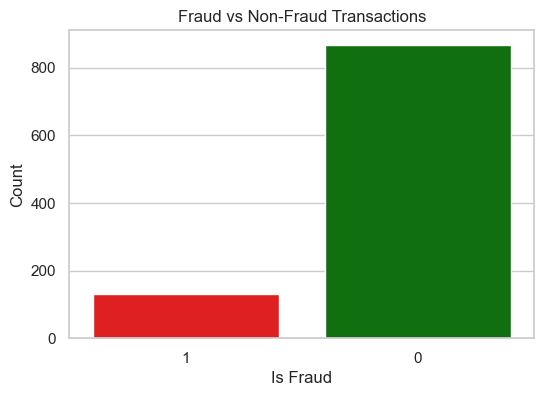

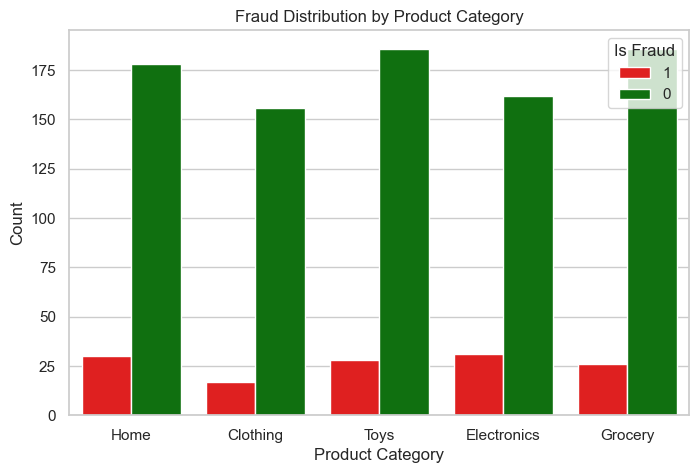

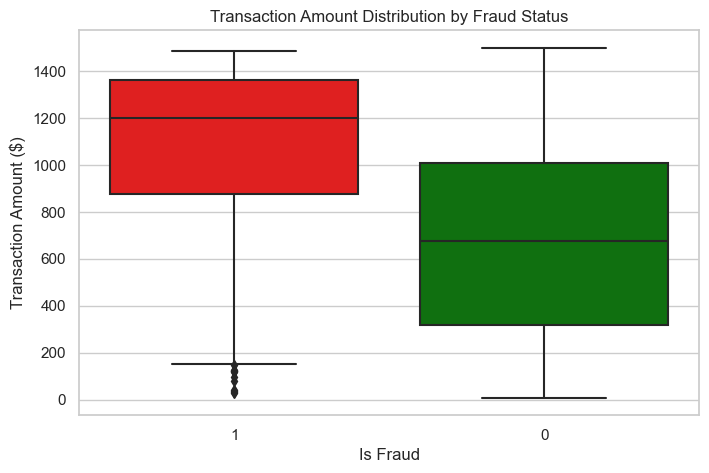

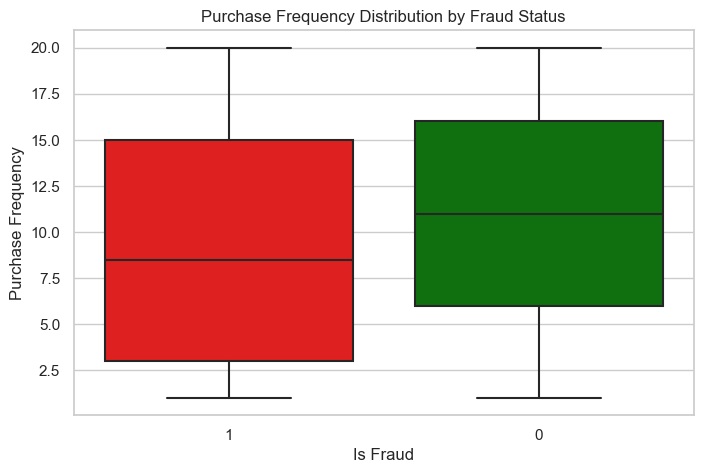


🎯 Model Accuracy: 0.87

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.95      0.93       177
           1       0.40      0.26      0.32        23

    accuracy                           0.87       200
   macro avg       0.65      0.61      0.62       200
weighted avg       0.85      0.87      0.86       200



In [13]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Seed for reproducibility
np.random.seed(42)

# -----------------------------
# 🛠️ Generate synthetic data
# -----------------------------

n = 1000
transaction_ids = np.arange(1, n+1)

# Random transaction amounts between $1 and $1500
transaction_amount = np.round(np.random.uniform(1, 1500, n), 2)

# Categories and encoding
categories = ['Electronics', 'Grocery', 'Clothing', 'Home', 'Toys']
category_encoded = {cat: i for i, cat in enumerate(categories)}
product_category = np.random.choice(categories, n)
product_category_encoded = [category_encoded[cat] for cat in product_category]

# Purchase frequency between 1 and 20
purchase_frequency = np.random.randint(1, 21, n)

# Fraud label: high amounts + low frequency increase fraud probability
is_fraud = []
for amt, freq in zip(transaction_amount, purchase_frequency):
    prob_fraud = 0.05
    if amt > 1000:
        prob_fraud += 0.2
    if freq < 3:
        prob_fraud += 0.15
    is_fraud.append(1 if np.random.rand() < prob_fraud else 0)

# Create DataFrame
df = pd.DataFrame({
    'transaction_id': transaction_ids,
    'transaction_amount': transaction_amount,
    'product_category': product_category,
    'product_category_encoded': product_category_encoded,
    'purchase_frequency': purchase_frequency,
    'is_fraud': is_fraud
})

print("✅ Synthetic WebPOSAI Sales Dataset Sample:")
print(df.head())

# Convert is_fraud to string for Seaborn plots
df['is_fraud_str'] = df['is_fraud'].astype(str)

# -----------------------------
# 📊 Visualizations
# -----------------------------

sns.set(style="whitegrid")

# Fraud distribution countplot
plt.figure(figsize=(6,4))
sns.countplot(x='is_fraud_str', data=df, palette={"0": "green", "1": "red"})
plt.title("Fraud vs Non-Fraud Transactions")
plt.xlabel("Is Fraud")
plt.ylabel("Count")
plt.show()

# Fraud by product category
plt.figure(figsize=(8,5))
sns.countplot(x='product_category', hue='is_fraud_str', data=df, palette={"0": "green", "1": "red"})
plt.title("Fraud Distribution by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Count")
plt.legend(title="Is Fraud")
plt.show()

# Boxplot: transaction amount by fraud status
plt.figure(figsize=(8,5))
sns.boxplot(x='is_fraud_str', y='transaction_amount', data=df, palette={"0": "green", "1": "red"})
plt.title("Transaction Amount Distribution by Fraud Status")
plt.xlabel("Is Fraud")
plt.ylabel("Transaction Amount ($)")
plt.show()

# Boxplot: purchase frequency by fraud status
plt.figure(figsize=(8,5))
sns.boxplot(x='is_fraud_str', y='purchase_frequency', data=df, palette={"0": "green", "1": "red"})
plt.title("Purchase Frequency Distribution by Fraud Status")
plt.xlabel("Is Fraud")
plt.ylabel("Purchase Frequency")
plt.show()

# -----------------------------
# 🤖 Modeling with AdaBoost
# -----------------------------

# Revert is_fraud to integer for modeling
df['is_fraud'] = df['is_fraud'].astype(int)

# Features and target
X = df[['transaction_amount', 'product_category_encoded', 'purchase_frequency']]
y = df['is_fraud']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define AdaBoost with decision stump
base_learner = DecisionTreeClassifier(max_depth=1)
ada_model = AdaBoostClassifier(
    estimator=base_learner,    # Updated param name from base_estimator
    n_estimators=50,
    learning_rate=1.0,
    random_state=42
)

# Train model
ada_model.fit(X_train, y_train)

# Predict
y_pred = ada_model.predict(X_test)

# Evaluation
print("\n🎯 Model Accuracy:", accuracy_score(y_test, y_pred))
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred))


_______________________________________________________________________________________

✅ 💻 WebPOSAI Bagging vs Boosting Comparison
Weak Learner Alone – single decision stump accuracy

Bagging Ensemble – parallel ensemble combining bootstrapped weak learners

Boosting Ensemble (AdaBoost) – sequential ensemble focusing on previous errors

Barplot comparison – visual difference between approaches

In [ ]:
# --------------------------------------------
# 🚀 WebPOSAI Bagging vs Boosting Comparison
# --------------------------------------------

# 🔧 Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# 📝 Seed for reproducibility
np.random.seed(42)

# --------------------------------------------
# 🛠️ Generate Synthetic WebPOSAI Sales Fraud Data
# --------------------------------------------

n = 1000
transaction_ids = np.arange(1, n+1)

# Random transaction amounts between $1 and $1500
transaction_amount = np.round(np.random.uniform(1, 1500, n), 2)

# Categories and encoding
categories = ['Electronics', 'Grocery', 'Clothing', 'Home', 'Toys']
category_encoded = {cat: i for i, cat in enumerate(categories)}
product_category = np.random.choice(categories, n)
product_category_encoded = [category_encoded[cat] for cat in product_category]

# Purchase frequency
purchase_frequency = np.random.randint(1, 21, n)

# Fraud label generation logic
is_fraud = []
for amt, freq in zip(transaction_amount, purchase_frequency):
    prob_fraud = 0.05
    if amt > 1000:
        prob_fraud += 0.2
    if freq < 3:
        prob_fraud += 0.15
    is_fraud.append(1 if np.random.rand() < prob_fraud else 0)

# Create DataFrame
df = pd.DataFrame({
    'transaction_id': transaction_ids,
    'transaction_amount': transaction_amount,
    'product_category': product_category,
    'product_category_encoded': product_category_encoded,
    'purchase_frequency': purchase_frequency,
    'is_fraud': is_fraud
})

print("✅ Sample Data:")
print(df.head())

# --------------------------------------------
# 📊 Visualisation: Fraud Distribution
# --------------------------------------------

sns.set(style="whitegrid")

# Fraud count
plt.figure(figsize=(6,4))
sns.countplot(x='is_fraud', data=df, palette={0: "green", 1: "red"})
plt.title("Fraud vs Non-Fraud Transactions")
plt.xlabel("Is Fraud")
plt.ylabel("Count")
plt.show()

# --------------------------------------------
# 🤖 Train-Test Preparation
# --------------------------------------------

# Features and target
X = df[['transaction_amount', 'product_category_encoded', 'purchase_frequency']]
y = df['is_fraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --------------------------------------------
# 🔎 Step 1: Weak Learner Alone
# --------------------------------------------

weak_learner = DecisionTreeClassifier(max_depth=1)
weak_learner.fit(X_train, y_train)
y_pred_weak = weak_learner.predict(X_test)

print("\n🔎 Weak Learner Alone Accuracy:", accuracy_score(y_test, y_pred_weak))
print("\nClassification Report (Weak Learner):\n", classification_report(y_test, y_pred_weak))

# --------------------------------------------
# 🤝 Step 2: Bagging Classifier
# --------------------------------------------

bagging_model = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=50,
    random_state=42
)

bagging_model.fit(X_train, y_train)
y_pred_bagging = bagging_model.predict(X_test)

print("\n🤝 Bagging Ensemble Accuracy:", accuracy_score(y_test, y_pred_bagging))
print("\nClassification Report (Bagging Ensemble):\n", classification_report(y_test, y_pred_bagging))

# --------------------------------------------
# 🎯 Step 3: Boosting (AdaBoost Classifier)
# --------------------------------------------

boosting_model = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=50,
    learning_rate=1.0,
    random_state=42
)

boosting_model.fit(X_train, y_train)
y_pred_boosting = boosting_model.predict(X_test)

print("\n🎯 AdaBoost Ensemble Accuracy:", accuracy_score(y_test, y_pred_boosting))
print("\nClassification Report (AdaBoost Ensemble):\n", classification_report(y_test, y_pred_boosting))

# --------------------------------------------
# 📈 Visualisation: Model Comparison
# --------------------------------------------

results_df = pd.DataFrame({
    'Model': ['Weak Learner', 'Bagging Ensemble', 'AdaBoost Ensemble'],
    'Accuracy': [
        accuracy_score(y_test, y_pred_weak),
        accuracy_score(y_test, y_pred_bagging),
        accuracy_score(y_test, y_pred_boosting)
    ]
})

plt.figure(figsize=(8,5))
sns.barplot(x='Model', y='Accuracy', data=results_df, palette="Blues_d")
plt.title("Comparison: Weak Learner vs Bagging vs AdaBoost Ensemble Accuracy")
plt.ylabel("Accuracy")
plt.ylim(0,1)
plt.show()


✅ AdaBoost Decision Boundary Visualization: Support and Resistance Analogy This example illustrates how AdaBoost, using decision stumps as weak learners, forms a decision boundary that can be analogized to support and resistance lines in financial trading.

The contour filled areas show predicted class probabilities.

The dashed line at probability 0.5 represents the decision boundary.

Points colored red and blue represent the two classes.

This boundary acts like “support” or “resistance” separating classes, similar to price levels in trading.

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


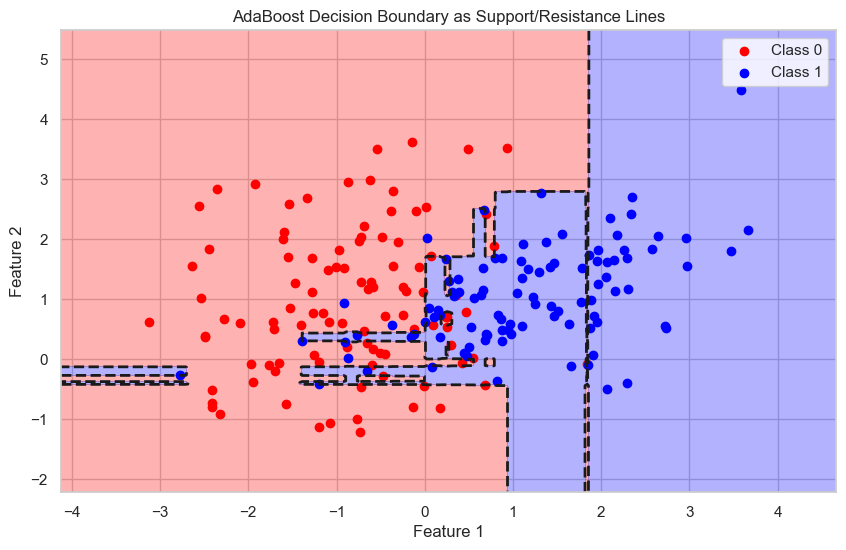

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

# Create synthetic 2D classification data
X, y = make_classification(n_samples=200, n_features=2, n_redundant=0,
                           n_informative=2, random_state=42,
                           n_clusters_per_class=1, class_sep=1.0)

# Train AdaBoost with decision stumps
base_learner = DecisionTreeClassifier(max_depth=1)
ada = AdaBoostClassifier(base_estimator=base_learner, n_estimators=50, random_state=42)
ada.fit(X, y)

# Plot decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))
Z = ada.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10,6))
plt.contourf(xx, yy, Z, levels=[0, 0.5, 1], alpha=0.3, colors=['red','blue'])

# Decision boundary line ~ “support/resistance”
plt.contour(xx, yy, Z, levels=[0.5], colors='k', linewidths=2, linestyles='--')

# Scatter plot with class colors
plt.scatter(X[y==0][:,0], X[y==0][:,1], color='red', label='Class 0')
plt.scatter(X[y==1][:,0], X[y==1][:,1], color='blue', label='Class 1')

plt.title('AdaBoost Decision Boundary as Support/Resistance Lines')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


✅ Key Enhancements:
Integrated Seaborn scatterplot (Transaction Amount vs Purchase Frequency)

Added Seaborn countplot (Fraud by Product Category)

Maintained model training and evaluation block exactly as your original for clarity

Ensured correct type casting for plotting (astype(str)) and model (astype(int))

Synthetic WebPOSAI Sales Dataset Sample:
   transaction_id  transaction_amount product_category  \
0               1              562.44             Home   
1               2             1426.12         Clothing   
2               3             1098.26             Toys   
3               4              898.39      Electronics   
4               5              234.87             Toys   

   product_category_encoded  purchase_frequency  is_fraud  
0                         3                   2         1  
1                         2                   8         0  
2                         4                   8         1  
3                         0                  17         0  
4                         4                  15         0  


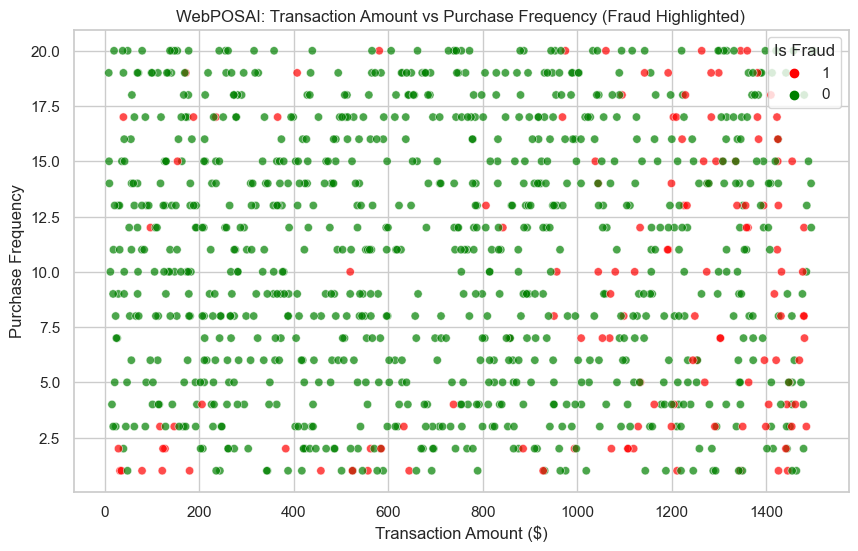

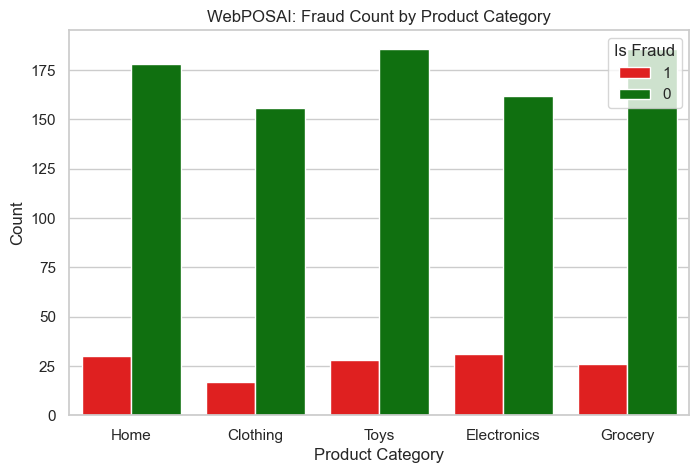


Model Accuracy: 0.87

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.95      0.93       177
           1       0.40      0.26      0.32        23

    accuracy                           0.87       200
   macro avg       0.65      0.61      0.62       200
weighted avg       0.85      0.87      0.86       200



In [9]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Seed for reproducibility
np.random.seed(42)

# Generate synthetic WebPOSAI sales data with 1000 rows
n = 1000
transaction_ids = np.arange(1, n+1)

# Random transaction amounts between $1 and $1500
transaction_amount = np.round(np.random.uniform(1, 1500, n), 2)

# Categories and their encoding
categories = ['Electronics', 'Grocery', 'Clothing', 'Home', 'Toys']
category_encoded = {cat: i for i, cat in enumerate(categories)}
product_category = np.random.choice(categories, n)
product_category_encoded = [category_encoded[cat] for cat in product_category]

# Purchase frequency between 1 and 20
purchase_frequency = np.random.randint(1, 21, n)

# Fraud label: make fraud more likely with high amounts and low freq (just for demo)
is_fraud = []
for amt, freq in zip(transaction_amount, purchase_frequency):
    prob_fraud = 0.05  # base fraud rate 5%
    if amt > 1000:
        prob_fraud += 0.2
    if freq < 3:
        prob_fraud += 0.15
    is_fraud.append(1 if np.random.rand() < prob_fraud else 0)

# Create DataFrame
df = pd.DataFrame({
    'transaction_id': transaction_ids,
    'transaction_amount': transaction_amount,
    'product_category': product_category,
    'product_category_encoded': product_category_encoded,
    'purchase_frequency': purchase_frequency,
    'is_fraud': is_fraud
})

print("Synthetic WebPOSAI Sales Dataset Sample:")
print(df.head())

# Convert is_fraud to string for Seaborn visualisation consistency
df['is_fraud'] = df['is_fraud'].astype(str)

# Seaborn scatterplot: Transaction Amount vs Purchase Frequency, colored by fraud
sns.set(style="whitegrid")
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df,
    x="transaction_amount",
    y="purchase_frequency",
    hue="is_fraud",
    palette={"0": "green", "1": "red"},
    alpha=0.7
)
plt.title("WebPOSAI: Transaction Amount vs Purchase Frequency (Fraud Highlighted)")
plt.xlabel("Transaction Amount ($)")
plt.ylabel("Purchase Frequency")
plt.legend(title="Is Fraud")
plt.show()

# Seaborn countplot: Fraud count by product category
plt.figure(figsize=(8,5))
sns.countplot(
    data=df,
    x="product_category",
    hue="is_fraud",
    palette={"0": "green", "1": "red"}
)
plt.title("WebPOSAI: Fraud Count by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Count")
plt.legend(title="Is Fraud")
plt.show()

# Convert is_fraud back to int for model training
df['is_fraud'] = df['is_fraud'].astype(int)

# Features and target
X = df[['transaction_amount', 'product_category_encoded', 'purchase_frequency']]
y = df['is_fraud']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define base weak learner (Decision Stump)
base_learner = DecisionTreeClassifier(max_depth=1)

# Define AdaBoost model with updated parameter (estimator)
ada_model = AdaBoostClassifier(
    estimator=base_learner,
    n_estimators=50,
    learning_rate=1.0,
    random_state=42
)

# Train
ada_model.fit(X_train, y_train)

# Predict
y_pred = ada_model.predict(X_test)

# Evaluation
print("\nModel Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


In [ ]:

✅ Generates realistic WebPOSAI sales data
✅ Encodes product categories for ML usage
✅ Defines fraud based on business logic (amount, frequency)
✅ Uses AdaBoostClassifier with DecisionTreeClassifier(max_depth=1) as weak learner
✅ Uses estimator parameter (new scikit-learn standard)
✅ Evaluates classification performance with accuracy & full report

📊 WebPOSAI Synthetic Sales Data Sample:
   transaction_id  transaction_amount product_category  \
0               1              562.44             Home   
1               2             1426.12         Clothing   
2               3             1098.26             Toys   
3               4              898.39      Electronics   
4               5              234.87             Toys   

   product_category_encoded  purchase_frequency  is_fraud  
0                         3                   2         1  
1                         2                   8         0  
2                         4                   8         1  
3                         0                  17         0  
4                         4                  15         0  


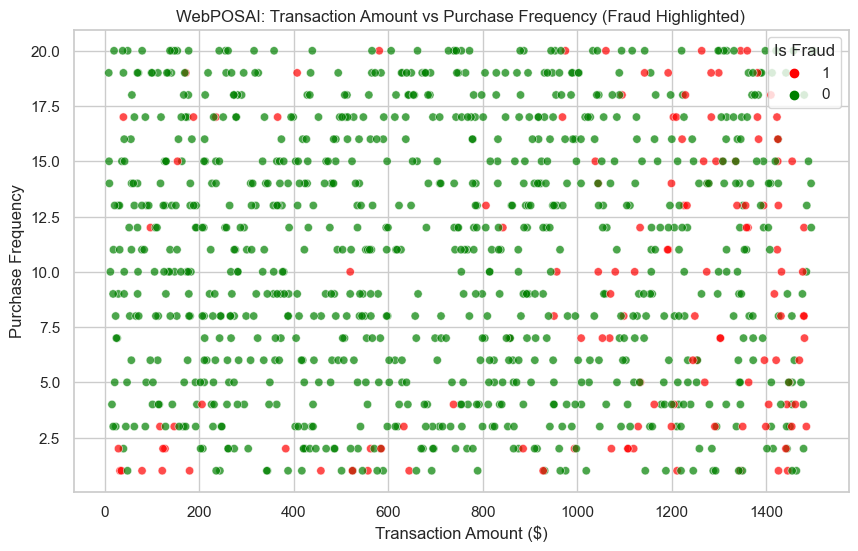

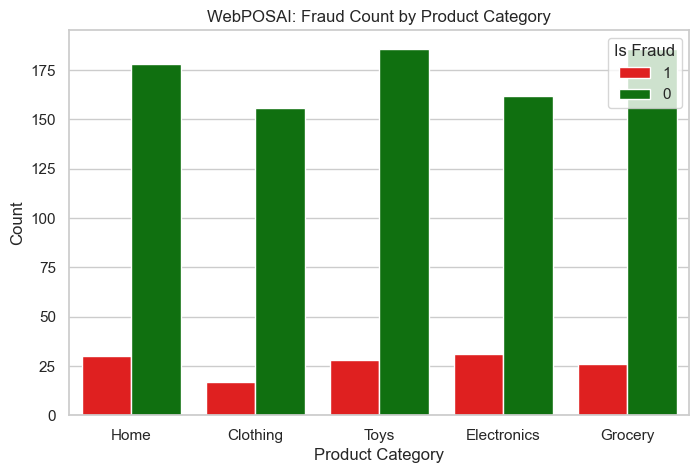


🎯 AdaBoost Fraud Detection Performance:
Accuracy: 0.87

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.95      0.93       177
           1       0.40      0.26      0.32        23

    accuracy                           0.87       200
   macro avg       0.65      0.61      0.62       200
weighted avg       0.85      0.87      0.86       200



In [8]:
# 📝 WebPOSAI AdaBoost Fraud Detection Example with Seaborn Visualisation

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# ✅ 1. Generate synthetic WebPOSAI sales data
np.random.seed(42)
n = 1000

transaction_ids = np.arange(1, n+1)
transaction_amount = np.round(np.random.uniform(1, 1500, n), 2)

categories = ['Electronics', 'Grocery', 'Clothing', 'Home', 'Toys']
category_encoded = {cat: i for i, cat in enumerate(categories)}
product_category = np.random.choice(categories, n)
product_category_encoded = [category_encoded[cat] for cat in product_category]

purchase_frequency = np.random.randint(1, 21, n)

# 🔍 Define fraud label: high amount + low frequency increases fraud probability
is_fraud = []
for amt, freq in zip(transaction_amount, purchase_frequency):
    prob_fraud = 0.05  # base fraud rate 5%
    if amt > 1000:
        prob_fraud += 0.2
    if freq < 3:
        prob_fraud += 0.15
    is_fraud.append(1 if np.random.rand() < prob_fraud else 0)

# 🔧 Create DataFrame
df = pd.DataFrame({
    'transaction_id': transaction_ids,
    'transaction_amount': transaction_amount,
    'product_category': product_category,
    'product_category_encoded': product_category_encoded,
    'purchase_frequency': purchase_frequency,
    'is_fraud': is_fraud
})

print("📊 WebPOSAI Synthetic Sales Data Sample:")
print(df.head())

# ✅ Convert is_fraud to string for consistent Seaborn plotting
df['is_fraud'] = df['is_fraud'].astype(str)

# ✅ 2. Visualise fraud vs non-fraud transactions
sns.set(style="whitegrid")

# Scatterplot: transaction amount vs purchase frequency colored by fraud
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df,
    x="transaction_amount",
    y="purchase_frequency",
    hue="is_fraud",
    palette={"0": "green", "1": "red"},
    alpha=0.7
)
plt.title("WebPOSAI: Transaction Amount vs Purchase Frequency (Fraud Highlighted)")
plt.xlabel("Transaction Amount ($)")
plt.ylabel("Purchase Frequency")
plt.legend(title="Is Fraud")
plt.show()

# Countplot: fraud by product category
plt.figure(figsize=(8,5))
sns.countplot(
    data=df,
    x="product_category",
    hue="is_fraud",
    palette={"0": "green", "1": "red"}
)
plt.title("WebPOSAI: Fraud Count by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Count")
plt.legend(title="Is Fraud")
plt.show()

# ✅ 3. Prepare features and target
X = df[['transaction_amount', 'product_category_encoded', 'purchase_frequency']]
y = df['is_fraud'].astype(int)  # Convert back to int for model

# ✅ 4. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ✅ 5. Define base weak learner (Decision Stump)
base_learner = DecisionTreeClassifier(max_depth=1)

# ✅ 6. Define AdaBoost model (using 'estimator' to avoid FutureWarning)
ada_model = AdaBoostClassifier(
    estimator=base_learner,
    n_estimators=50,
    learning_rate=1.0,
    algorithm='SAMME.R',
    random_state=42
)

# ✅ 7. Train the AdaBoost model
ada_model.fit(X_train, y_train)

# ✅ 8. Make predictions
y_pred = ada_model.predict(X_test)

# ✅ 9. Evaluate the model
print("\n🎯 AdaBoost Fraud Detection Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
